## Have you ever wondered when the best time of year to book a hotel room is? 
## Or the optimal length of stay in order to get the best daily rate?
## What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?
## This hotel booking dataset can help you explore those questions!


## This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

## Explore and analyze the data to discover important factors that govern the bookings.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [4]:
sns.set_style('darkgrid')

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.shape

(119390, 32)

In [7]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [8]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

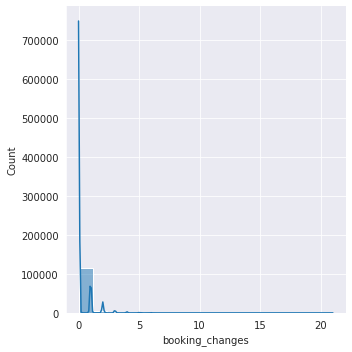

In [9]:
sns.displot(data = data , x = 'booking_changes', kde = True)

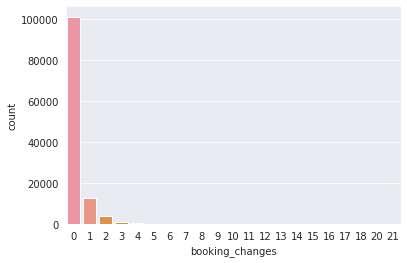

In [10]:
sns.countplot(x="booking_changes", data=data)

In [11]:
# The percentage of missing values
# Mostly concentrated in one feature - company

round(data.isnull().sum().sum() /np.product(data.shape) * 100, 3)

3.388

In [12]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Data exploration**

In [13]:
df = data.copy()

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Things to explore:\
Explore the rooms reservation not made \
Peak seasons \
Cancellations \
Waiting time \
Booking Changes \
Adr


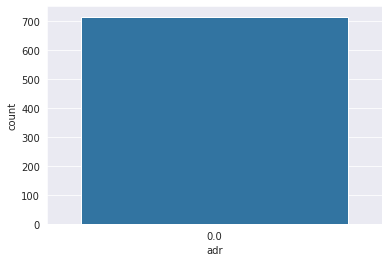

The number of reservations with no stay booked :  715


In [18]:
# Guests who come and go dont book a room have 0 adr
# Who comes here 
# Who are these people

sns.countplot(data = df.loc[(df['stays_in_weekend_nights'] == 0)  &	
                            (df['stays_in_week_nights'] == 0)],x = 'adr' )
plt.show()

print('The number of reservations with no stay booked : ', df.loc[(df['stays_in_weekend_nights'] == 0)  &	
                            (df['stays_in_week_nights'] == 0)].shape[0])

In [33]:
df.loc[(df['stays_in_weekend_nights'] == 0)  & (df['stays_in_week_nights'] == 0)]['adults'].value_counts()
df.loc[(df['stays_in_weekend_nights'] == 0)  & (df['stays_in_week_nights'] == 0)]['children'].value_counts()

0.0    681
1.0     19
2.0     15
Name: children, dtype: int64

Text(0.5, 0, 'Years')

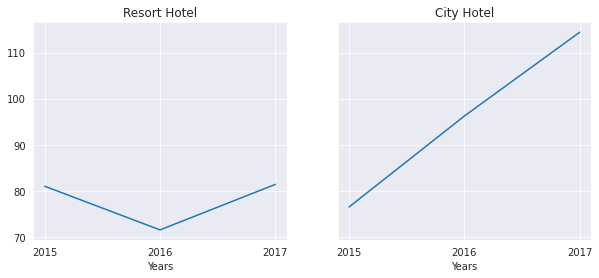

In [35]:
# To check the adr trends 

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

fig.set_figwidth(10)

bar_data_resort = df.loc[(df['hotel']== 'Resort Hotel') & (df['stays_in_week_nights'] == 2)]\
.groupby(['arrival_date_year'])['adr'].median().sort_index()

labels = [str (ele) for ele in bar_data_resort.index]
values = [ele for ele in bar_data_resort.values]

ax1.plot(labels, values)
ax1.set_title('Resort Hotel')
ax1.set_xlabel('Years')



bar_data_city = df.loc[(df['hotel']== 'City Hotel') & (df['stays_in_week_nights'] == 2)]\
.groupby(['arrival_date_year'])['adr'].median().sort_index()

labels = [str (ele) for ele in bar_data_city.index]
values = [ele for ele in bar_data_city.values]

ax2.plot(labels, values)
ax2.set_title('City Hotel')
ax2.set_xlabel('Years')



#del(bar_data_resort, bar_data_city, labels, values)

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [97]:
df.loc[:5, ['arrival_date_day_of_month' ,'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']]

,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adr
0,1,0,0,0.0
1,1,0,0,0.0
2,1,0,1,75.0
3,1,0,1,75.0
4,1,0,2,98.0
5,1,0,2,98.0


In [41]:
df.loc[8:10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


In [42]:
# HB meals seem to be more expensive
# Raise the adr
# See how it impacts the cancelation rates

df.groupby('meal')['adr'].median()

meal
BB            91.67
FB            84.00
HB           107.00
SC            96.00
Undefined     79.00
Name: adr, dtype: float64

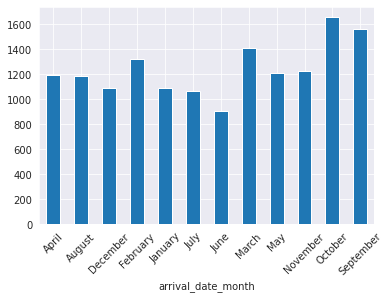

In [ ]:
df[df['reserved_room_type']!= df['assigned_room_type']].groupby('arrival_date_month')\
['lead_time'].count().plot.bar(rot = 45)

In [ ]:
df[df['reserved_room_type']!= df['assigned_room_type']][:3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,97.0,0,3,Check-Out,2015-07-05
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,97.0,0,3,Check-Out,2015-07-05


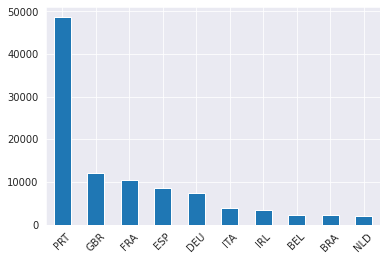

In [ ]:
# Distribution of country

df['country'].value_counts()[:10].plot.bar(rot = 45)

In [ ]:
# Lot of countries

df['country'].nunique()

177

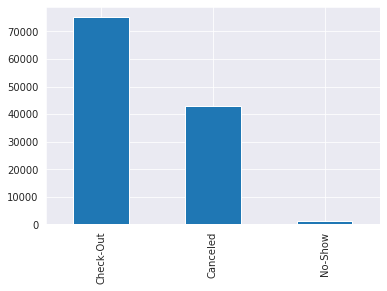

In [ ]:
df['reservation_status'].value_counts().plot.bar()

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df['is_canceled'].value_counts()[1]

44224

In [ ]:
# See if cancelled

df['is_canceled'].value_counts()[1] == df['reservation_status'].value_counts()[1:].sum()

True

The number of samples for cancelled reservation does tally \\
 Condition is true

### Cancellation

In [51]:
'''
# To change the month names to month numbers

col : column with month values  

'''

def month_nums(col):

  if col == 'January':
    t = 1
  elif col == 'February':
    t = 2
  elif col == 'March':
    t = 3
  elif col == 'April':
    t = 4
  elif col == 'May':
    t = 5
  elif col == 'June':
    t = 6
  elif col == 'July':
    t = 7
  elif col == 'August':
    t = 8
  elif col == 'September':
    t = 9
  elif col == 'October':
    t = 10
  elif col == 'November':
    t = 11
  elif col == 'December':
    t = 12
  
  return t


Text(0.5, 1.0, 'Cancellations by month (%)')

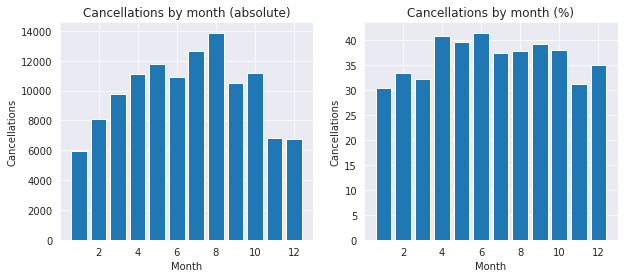

In [63]:
fig , (ax1, ax2) = plt.subplots(1,2)

fig.set_figwidth(10)
cancel_months = pd.DataFrame({'month' : df.groupby('arrival_date_month')['is_canceled'].count().index,
                             'canceled_nums' : df.groupby('arrival_date_month')['is_canceled'].count().values})


# cancel_months = pd.DataFrame(df.groupby('arrival_date_month')['is_canceled'].count())
cancel_months['month_num'] = cancel_months['month'].apply(month_nums)
cancel_months.sort_values('month_num')

x = cancel_months.sort_values('month_num')['month_num'].values
y = cancel_months.sort_values('month_num')['canceled_nums'].values

ax1.bar(x, y)
ax1.set_xlabel('Month')
ax1.set_ylabel('Cancellations')
ax1.set_title('Cancellations by month (absolute)')

cancel_months = pd.DataFrame({'month' : df.groupby('arrival_date_month')['is_canceled'].mean().index,
                             'canceled_rate' : df.groupby('arrival_date_month')['is_canceled'].mean().values})

cancel_months['canceled_rate'] = cancel_months['canceled_rate'] * 100

cancel_months['month_num'] = cancel_months['month'].apply(month_nums)
cancel_months.sort_values('month_num')

x = cancel_months.sort_values('month_num')['month_num'].values
y = cancel_months.sort_values('month_num')['canceled_rate'].values

ax2.bar(x, y)
ax2.set_xlabel('Month')
ax2.set_ylabel('Cancellations')
ax2.set_title('Cancellations by month (%)')


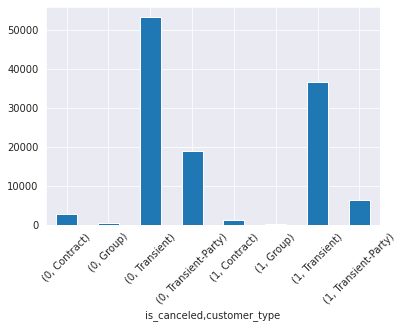

In [ ]:
df.groupby(['is_canceled', 'customer_type'])['customer_type'].count().plot.bar(rot = 45)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


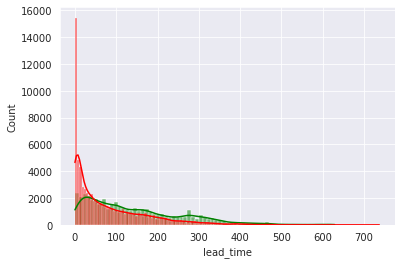

In [ ]:
# To see cancellation and lead_time relationship

sns.histplot(data = df.loc[df['is_canceled'] == 1], x = 'lead_time', 
             kde = True, color = 'green')
sns.histplot(data = df.loc[df['is_canceled'] == 0], x = 'lead_time', 
             kde = True, color = 'red')

In [124]:
df[df['is_canceled']== 0]['lead_time'].describe().index

df[df['is_canceled']== 0]['lead_time'].describe().values

df[df['is_canceled']== 1]['lead_time'].describe().values

canceled_stats = pd.DataFrame({'stats' : df[df['is_canceled']== 0]['lead_time'].describe().index,
              'canceled = False' : df[df['is_canceled']== 0]['lead_time'].describe().values.round(0),
              'canceled = True' : df[df['is_canceled']== 1]['lead_time'].describe().values.round(0)

})

canceled_stats

# del(canceled_stats)

,stats,canceled = False,canceled = True
0,count,75166.0,44224.0
1,mean,80.0,145.0
2,std,91.0,119.0
3,min,0.0,0.0
4,25%,9.0,48.0
5,50%,45.0,113.0
6,75%,124.0,214.0
7,max,737.0,629.0


Text(0.5, 0, 'Country')

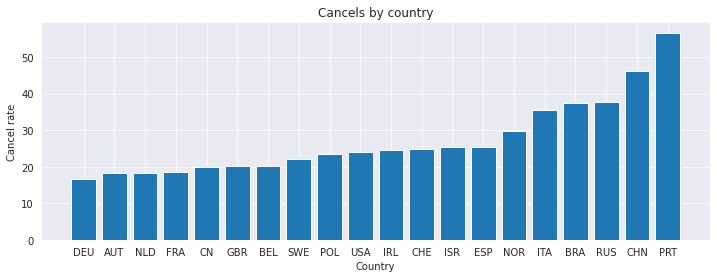

In [122]:
# To find the cancelation rate by country
# Too difficult to interpret as it is a high cardinality feature

indices = []

for x in df['country'].value_counts()[:20].index.tolist():

  indices.extend(df.loc[df['country'] == x].index.tolist())

indices = set(indices)
len(indices)

fig, ax = plt.subplots()

fig.set_figwidth(12)

country_cancels = df.loc[indices].groupby('country')['is_canceled'].mean().sort_values()
ax.bar(country_cancels.index, country_cancels.values * 100)
ax.set_title('Cancels by country')
ax.set_ylabel('Cancel rate')
ax.set_xlabel('Country')


In [125]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


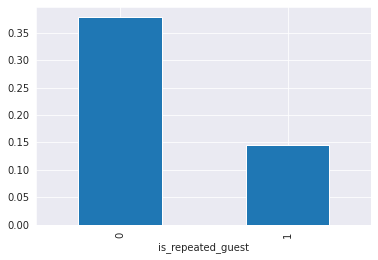

In [132]:
# Is repeated guest ??

df.groupby('is_repeated_guest')['is_canceled'].mean().plot.bar()

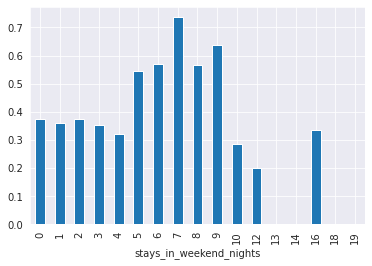

In [134]:
df.groupby('stays_in_weekend_nights')['is_canceled'].mean().plot.bar()

In [145]:
indices = []

for x in df['stays_in_weekend_nights'].value_counts()[:5].index.tolist():

  indices.extend(df.loc[df['stays_in_weekend_nights'] == x].index.tolist())

indices = set(indices)
len(indices)

df[indices].groupby('stays_in_weekend_nights')['']

0    51998
2    33308
1    30626
4     1855
3     1259
Name: stays_in_weekend_nights, dtype: int64

In [138]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [141]:
df.loc[df['stays_in_week_nights']>10][:3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
31,Resort Hotel,0,95,2015,July,27,1,4,11,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,63.86,0,0,Check-Out,2015-07-16
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,242.0,NaN,0,Transient,108.73,0,2,Canceled,2015-04-15
406,Resort Hotel,0,113,2015,July,29,14,4,11,3,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,1,No Deposit,NaN,NaN,0,Transient,187.50,1,3,Check-Out,2015-07-29


In [143]:
df.columns.get_loc('adults')


9

### Waiting Time